In [6]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import models,transforms

In [7]:
print("Pytorch Version:",torch.__version__)
print("TorchVision Version",torch.__version__)

Pytorch Version: 1.12.1+cu113
TorchVision Version 1.12.1+cu113


In [8]:
#学習済みモデルで検証
use_pretrained=True
net=models.vgg16(pretrained=use_pretrained)
net.eval()
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
#前処理
class BaseTransform():
  def __init__(self,resize,mean,std):
    self.base_transform=transforms.Compose([transforms.Resize(resize),
                                            transforms.CenterCrop(resize),
                                            transforms.ToTensor(),
                                            transforms.Normalize(mean,std)
                                            ])
    
  def __call__(self,img):
    return self.base_transform(img)


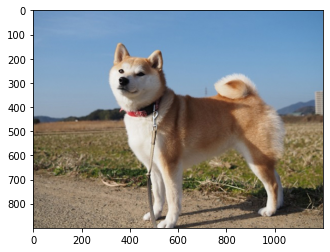

In [10]:
image_file_path="/content/dog.jpg"
img=Image.open(image_file_path)

plt.imshow(img)
plt.show()

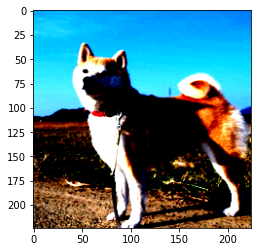

In [11]:
resize=224
mean=(0.485,0.456,0.406)
std=(0.229,0.224,0.225)
transform=BaseTransform(resize,mean,std)
img_transformed=transform(img)

img_transformed=img_transformed.numpy().transpose((1,2,0))
img_transformed=np.clip(img_transformed,0,1)
plt.imshow(img_transformed)
plt.show()

In [12]:
# make_folders_and_data_downloads.ipynbの中身を実行
import os
import urllib.request
import zipfile


data_dir = "./data/"
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
save_path = os.path.join(data_dir, "imagenet_class_index.json")

if not os.path.exists(save_path):
    urllib.request.urlretrieve(url, save_path)

url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
save_path = os.path.join(data_dir, "hymenoptera_data.zip")

if not os.path.exists(save_path):
    urllib.request.urlretrieve(url, save_path)

    # ZIPファイルを読み込み
    zip = zipfile.ZipFile(save_path)
    zip.extractall(data_dir)  # ZIPを解凍
    zip.close()  # ZIPファイルをクローズ

    # ZIPファイルを消去
    os.remove(save_path)

In [13]:
ILSVRC_class_index=json.load(open("/content/data/imagenet_class_index.json",'r'))
ILSVRC_class_index

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [14]:
#出力結果からラベルを予測
class ILSVRCPre():
  def __init__(self,class_index):
    self.class_index=class_index

  def predict_max(self,out):
    maxid=np.argmax(out.detach().numpy())
    predicted_label_name=self.class_index[str(maxid)][1]

    return predicted_label_name

In [15]:
#画像のラベル予測
predictor=ILSVRCPre(ILSVRC_class_index)

image_file_path='/content/dog.jpg'
img=Image.open(image_file_path)
transform=BaseTransform(resize,mean,std)
img_transformed=transform(img)
#バッチサイズの１を追加
inputs=img_transformed.unsqueeze(0)

out=net(inputs)
result=predictor.predict_max(out)

print("予測結果:",result)

予測結果: Eskimo_dog


In [16]:
import random
torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

In [96]:
#前処理クラス
class ImageTransform():
  def __init__(self,resize,mean,std):
    self.data_transform={
        'train':transforms.Compose([
            #スケールを0.5~1.0, アスペクト比3/4~4/3にランダム変更
            transforms.RandomResizedCrop(resize,scale=(0.5,1.0)),
            #左右反転を50%で行う
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean,std)
        ]),
        'val':transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean,std)
        ])
    }

  def __call__(self, img, phase='train'):
    return self.data_transform[phase](img)

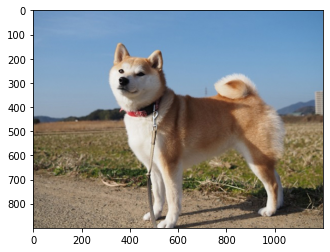

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x900 at 0x7F3528F3DC90>


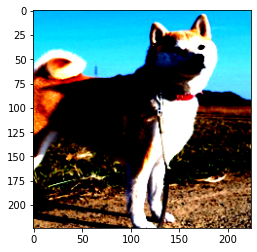

In [18]:
image_file_path = '/content/dog.jpg'
img = Image.open(image_file_path)   
plt.imshow(img)
plt.show()
size = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
print(img)
transform = ImageTransform(size, mean, std)
img_transformed = transform(img, phase="train")  # torch.Size([3, 224, 224])

# (色、高さ、幅)を (高さ、幅、色)に変換し、0-1に値を制限して表示
img_transformed = img_transformed.numpy().transpose((1, 2, 0))
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()

In [19]:
from sklearn.datasets import fetch_lfw_people
lfw = fetch_lfw_people(data_home='./scikit_learn_data/',color=True , min_faces_per_person=100)

In [20]:
x=lfw.images
y=lfw.target

In [21]:
print(lfw.target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [44]:
x1="/content/scikit_learn_data/lfw_home/lfw_funneled/Colin_Powell/"
x2="/content/scikit_learn_data/lfw_home/lfw_funneled/Donald_Rumsfeld/"
x3="/content/scikit_learn_data/lfw_home/lfw_funneled/George_W_Bush/"
x4="/content/scikit_learn_data/lfw_home/lfw_funneled/Gerhard_Schroeder/"
x5="/content/scikit_learn_data/lfw_home/lfw_funneled/Tony_Blair/"
x_data=x1+x2+x3+x4+x5

In [78]:
import os.path as osp
import glob
import random
import torch.utils.data as data

In [48]:
y1="/content/scikit_learn_data/lfw_home/lfw_funneled/Christy_Turlington/Christy_Turlington_0001.jpg"

In [88]:
y2="/content/scikit_learn_data/lfw_home/lfw_funneled/Tony_Blair/Tony_Blair_0030.jpg"
y2[47:52]

'd/Ton'

In [89]:
alist=["Colin_Powell","Donald_Rumsfeld","George_W_Bush","Gerhard_Schroeder","Tony_Blair"]
def make_datapath_list():
  
  path_train_list=[]
  path_test_list=[]
  for name in alist:
    print(name)
    rootpath="/content/scikit_learn_data/lfw_home/lfw_funneled/"
    target_path=osp.join(rootpath+name+'/*.jpg')
    print(target_path[25:28])
    for path in glob.glob(target_path):
      print("path:"+path)
      rando=random.random()
      if rando<=0.6:
        path_train_list.append(path)
      else:
        path_test_list.append(path)
  return path_train_list,path_test_list

In [92]:
alist[0][0:3]

'Col'

In [75]:
train_list,test_list=make_datapath_list()

Colin_Powell
/content/scikit_learn_data/lfw_home/lfw_funneled/Colin_Powell/*.jpg
path:/content/scikit_learn_data/lfw_home/lfw_funneled/Colin_Powell/Colin_Powell_0093.jpg
path:/content/scikit_learn_data/lfw_home/lfw_funneled/Colin_Powell/Colin_Powell_0138.jpg
path:/content/scikit_learn_data/lfw_home/lfw_funneled/Colin_Powell/Colin_Powell_0020.jpg
path:/content/scikit_learn_data/lfw_home/lfw_funneled/Colin_Powell/Colin_Powell_0156.jpg
path:/content/scikit_learn_data/lfw_home/lfw_funneled/Colin_Powell/Colin_Powell_0025.jpg
path:/content/scikit_learn_data/lfw_home/lfw_funneled/Colin_Powell/Colin_Powell_0167.jpg
path:/content/scikit_learn_data/lfw_home/lfw_funneled/Colin_Powell/Colin_Powell_0226.jpg
path:/content/scikit_learn_data/lfw_home/lfw_funneled/Colin_Powell/Colin_Powell_0083.jpg
path:/content/scikit_learn_data/lfw_home/lfw_funneled/Colin_Powell/Colin_Powell_0227.jpg
path:/content/scikit_learn_data/lfw_home/lfw_funneled/Colin_Powell/Colin_Powell_0128.jpg
path:/content/scikit_learn_da

In [76]:
len(train_list)

686

In [77]:
len(test_list)

454

In [93]:
class MakeDataset(data.Dataset):
  def __init__(self,file_list,transform=None,phase='train'):
    self.file_list=file_list
    self.transform=transform
    self.phase=phase

  def __len__(self):
    return len(self.file_list)

  def __getitem__(self, index):
    img_path=self.file_list[index]
    img=Image.open(img_path)
    img_transformed=self.transform(img,self.phase)
    if img_path[49:52]==alist[0][0:3]:
      label=0
    elif img_path[49:52]==alist[1][0:3]:
      label=1
    elif img_path[49:52]==alist[2][0:3]:
      label=2
    elif img_path[49:52]==alist[3][0:3]:
      label=3
    elif img_path[49:52]==alist[4][0:3]:
      label=4

    return img_transformed,label

In [97]:
train_dataset=MakeDataset(file_list=train_list,transform=ImageTransform(size,mean,std),phase="train")
test_dataset=MakeDataset(file_list=test_list,transform=ImageTransform(size,mean,std),phase="val")

In [98]:
index=0
print(train_dataset.__getitem__(index)[0].size())
print(train_dataset.__getitem__(index)[1])

torch.Size([3, 224, 224])
0


In [99]:
#DataLoaderの作成
batch_size=32
train_dataloader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
val_dataloader=torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=False)
dataloaders_dict={"train":train_dataloader,"val":val_dataloader}

In [100]:
batch_iterator=iter(dataloaders_dict["train"])
inputs,labels=next(batch_iterator)
print(inputs.size())
print(labels)

torch.Size([32, 3, 224, 224])
tensor([2, 0, 4, 0, 2, 2, 2, 4, 2, 0, 3, 4, 0, 2, 2, 2, 2, 2, 4, 0, 2, 4, 1, 1,
        0, 1, 4, 4, 0, 2, 0, 3])


In [101]:
#モデルの作成
use_pretrained=True
net=models.vgg16(pretrained=use_pretrained)
print(net)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [103]:
import torch.nn as nn
net.classifier[6]=nn.Linear(in_features=4096,out_features=5)
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [104]:
net.train()
criterion=nn.CrossEntropyLoss()

In [105]:
#転移学習の設定
params_to_update=[]
update_param_names=["classifier.6.weight","classifier.6.bias"]
for name,param in net.named_parameters():
  if name in update_param_names:
    param.requires_grad=True
    params_to_update.append(param)
    print(name)
  else:
    param.requires_grad=False

print("--------")
print(params_to_update)

classifier.6.weight
classifier.6.bias
--------
[Parameter containing:
tensor([[ 0.0067, -0.0146,  0.0134,  ...,  0.0144,  0.0046, -0.0010],
        [-0.0125,  0.0003, -0.0001,  ...,  0.0148, -0.0155, -0.0127],
        [-0.0143,  0.0075, -0.0147,  ...,  0.0120,  0.0122, -0.0123],
        [-0.0093, -0.0062,  0.0071,  ..., -0.0036, -0.0072,  0.0139],
        [-0.0035,  0.0091, -0.0074,  ..., -0.0155,  0.0030, -0.0131]],
       requires_grad=True), Parameter containing:
tensor([ 0.0103,  0.0109, -0.0027, -0.0073,  0.0069], requires_grad=True)]


In [107]:
import torch.optim as optim
optimizer=optim.SGD(params=params_to_update,lr=0.001,momentum=0.9)

In [108]:
from tqdm import tqdm
def train_model(net,dataloaders_dict,criterion,optimizer,num_epochs):
  for epoch in range(num_epochs):
    print("Epoch {}/{}".format(epoch+1,num_epochs))
    print("-------")

    for phase in ["train","val"]:
      if phase=="train":
        net.train()
      else:
        net.eval()

      epoch_loss=0.0
      epoch_corrects=0
      if(epoch==0)and(phase=="train"):
        continue
      
      for inputs,labels in tqdm(dataloaders_dict[phase]):
        optimizer.zero_grad()
        with torch.set_grad_enabled(phase=="train"):
          outputs=net(inputs)
          loss=criterion(outputs,labels)
          _,preds=torch.max(outputs,1)

          if phase=="train":
            loss.backward()
            optimizer.step()
          
          epoch_loss+=loss.item() * inputs.size(0)
          epoch_corrects+=torch.sum(preds==labels.data)

      epoch_loss=epoch_loss / len(dataloaders_dict[phase].dataset)
      epoch_acc=epoch_corrects.double() / len(dataloaders_dict[phase].dataset)

      print("{} Loss: {:.4f} Acc: {:4f}".format(phase,epoch_loss,epoch_acc))

In [110]:
num_epochs=5
train_model(net,dataloaders_dict,criterion,optimizer,num_epochs=num_epochs)

Epoch 1/5
-------


100%|██████████| 15/15 [03:13<00:00, 12.90s/it]


val Loss: 1.7145 Acc: 0.101322
Epoch 2/5
-------


100%|██████████| 22/22 [05:18<00:00, 14.47s/it]


train Loss: 1.4662 Acc: 0.427114


100%|██████████| 15/15 [03:13<00:00, 12.90s/it]


val Loss: 1.2849 Acc: 0.491189
Epoch 3/5
-------


100%|██████████| 22/22 [04:51<00:00, 13.25s/it]


train Loss: 1.3128 Acc: 0.475219


100%|██████████| 15/15 [03:11<00:00, 12.78s/it]


val Loss: 1.2479 Acc: 0.497797
Epoch 4/5
-------


100%|██████████| 22/22 [04:49<00:00, 13.17s/it]


train Loss: 1.2492 Acc: 0.500000


100%|██████████| 15/15 [03:11<00:00, 12.77s/it]


val Loss: 1.1789 Acc: 0.535242
Epoch 5/5
-------


100%|██████████| 22/22 [04:54<00:00, 13.38s/it]


train Loss: 1.1803 Acc: 0.530612


100%|██████████| 15/15 [03:16<00:00, 13.12s/it]

val Loss: 1.1246 Acc: 0.566079


In [112]:
save_path="./weights_tenni_tuning.pth"
torch.save(net.state_dict(),save_path)

In [113]:
load_path="./weights_tenni_tuning.pth"
load_weights=torch.load(load_path)
net.load_state_dict(load_weights)

<All keys matched successfully>